In [107]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import pdb
import aspirin
from aspirin.data.load_data import load_data
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# regulate size the default plot
plt.rcParams['figure.figsize'] = [10, 5]

In [110]:
orig_data = load_data('../data/Data_Novartis_Datathon-Participants.csv')

> /home/frank/Documents/novartis_datathon/dudewheresmyaspirin/aspirin/data/load_data.py(8)load_data()
-> data = pd.read_csv(path, header=[0, 1, 2, 3], sep=';')
(Pdb) c


In [111]:
data = load_data('../data/Data_Novartis_Datathon-Participants.csv')

> /home/frank/Documents/novartis_datathon/dudewheresmyaspirin/aspirin/data/load_data.py(8)load_data()
-> data = pd.read_csv(path, header=[0, 1, 2, 3], sep=';')
(Pdb) 
(Pdb) 
(Pdb) c


In [112]:
data = pd.read_csv('../data/Data_Novartis_Datathon-Participants.csv', header=[0, 1, 2, 3], sep=';')
data.columns = [col[3] for col in data.columns]
data = data[[col for col in data if 'Unnamed' not in col]]
data = data.rename(columns={' Country': 'Country'})

index_cols = ['Cluster', 'Brand Group', 'Country', 'Function']
date_cols = [col for col in data.columns if col not in index_cols]
data = pd.melt(data, id_vars=index_cols,value_vars=date_cols)
data['value'] = data['value'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)


index_cols = ['Cluster', 'Brand Group', 'Country', 'variable']
data = pd.pivot_table(data, columns=['Function'], index=index_cols)
data.columns = [col[1] for col in data.columns]
data = data.reset_index()


import calendar
import datetime
month_dict = {v: k for k,v in enumerate(calendar.month_abbr)}

index_cols = ['Cluster', 'Brand Group', 'Country', 'Function', 'variable']

data['year'] = data['variable'].apply(lambda x: x.split(' ')[1])
data['month'] = data['variable'].apply(lambda x: x.split(' ')[0])
data['month_num'] = data['month'].map(month_dict)
data['date'] = data.apply(lambda x: pd.Timestamp(year=int(x['year']), month=int(x['month_num']), day=1), axis=1)
data = data.drop('variable', axis=1)



Cluster     Brand Group     Country      Function      Jan 2012  \
0  Cluster 3  Brand Group 12  Country 19       Sales 1   1861,328751   
1  Cluster 3  Brand Group 12  Country 19       Sales 2   1316,247027   
2  Cluster 3  Brand Group 12  Country 19  Investment 1  -216,1626575   
3  Cluster 3  Brand Group 12  Country 19  Investment 2  -107,4341352   
4  Cluster 3  Brand Group 12  Country 19  Investment 4             0   

       Feb 2012      Mar 2012      Apr 2012      May 2012      Jun 2012  \
0   1995,945017   1998,533792   2019,243986   2425,681558   2443,802978   
1   1450,223283   1440,837462   1564,066421   2014,132904   1792,307471   
2  -238,1672394  -217,4570447  -214,8682703  -390,9049256  -120,3780069   
3  -14,23825888  -62,13058419  -91,90148912  -199,3356243  -253,6998855   
4             0             0             0             0             0   

       ...           Mar 2018      Apr 2018      May 2018      Jun 2018  \
0      ...                NaN           NaN           NaN           NaN   
1      ...                NaN           NaN           NaN           NaN   
2      ...       -159,7273769  -141,9942726  -127,3676976  -162,4455899   
3      ...       -43,36197022  -83,48797251  -34,56013746  -37,40778923   
4      ...        1,682703322             0             0             0   

       Jul 2018      Aug 2018      Sep 2018      Oct 2018      Nov 2018  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2   -146,395189  -145,1008018  -171,8946163  -136,9461627  -189,9749661   
3  -35,59564719   -64,4604811  -111,7056128  -29,25315006  -133,4344906   
4             0             0   -3,10652921             0             0   

       Dec 2018  
0           NaN  
1           NaN  
2  -156,6809082  
3  -88,01832725  
4             0  

[5 rows x 88 columns]

In [115]:
import calendar
import datetime
month_dict = {v: k for k,v in enumerate(calendar.month_abbr)}

index_cols = ['Cluster', 'Brand Group', 'Country', 'Function', 'variable']

data['year'] = data['variable'].apply(lambda x: x.split(' ')[1])
data['month'] = data['variable'].apply(lambda x: x.split(' ')[0])
data['month_num'] = data['month'].map(month_dict)
data['date'] = data.apply(lambda x: pd.Timestamp(year=int(x['year']), month=int(x['month_num']), day=1), axis=1)
data = data.drop('variable', axis=1)



In [116]:
data = data.set_index(['Cluster', 'Brand Group', 'Country', 'date'])

In [20]:
c1_filter = data.index.get_level_values(0) == 'Cluster 1'

In [29]:
c1_jan_2012 = data[c1_filter][data[c1_filter].index.get_level_values(3) == '2012-01-01T00:00:00.000000000']

In [49]:
len(c1_jan_2012.index.get_level_values(1))

625

In [50]:
len(c1_jan_2012['Sales 1'].values)

625

<BarContainer object of 625 artists>

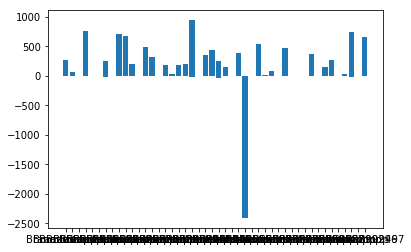

In [56]:
plt.bar(c1_jan_2012.index.get_level_values(1), c1_jan_2012['Sales 2'].values)

In [23]:
all_dates = data.index.get_level_values(3)

In [11]:
data.head()

Investment 1  Investment 2  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   

                                                Investment 3  Investment 4  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01      0.000000           0.0   
                                    2013-04-01      0.000000           0.0   
                                    2014-04-01     -0.682549           0.0   
                                    2015-04-01      0.000000           0.0   
                                    2016-04-01      0.000000           0.0   

                                                Investment 5  Investment 6  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   

                                                  Sales 1    Sales 2  year  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01  21.735670  19.227058  2012   
                                    2013-04-01  31.111031  30.221144  2013   
                                    2014-04-01  16.197425  15.555994  2014   
                                    2015-04-01  15.122488  14.335211  2015   
                                    2016-04-01  15.093484  13.025596  2016   

                                               month  month_num  
Cluster   Brand Group    Country    date                         
Cluster 1 Brand Group 12 Country 10 2012-04-01   Apr          4  
                                    2013-04-01   Apr          4  
                                    2014-04-01   Apr          4  
                                    2015-04-01   Apr          4  
                                    2016-04-01   Apr          4

### Lags as features

In [204]:
# so for each brand-cluster-country combination, shift the lags 
clusters = np.unique(data.index.get_level_values(0))
brand_groups = np.unique(data.index.get_level_values(1))
countries = np.unique(data.index.get_level_values(2))

In [60]:
# now filter to get a single subset 
cluster = clusters[0]
brand_group = brand_groups[0]
country = countries[0]

In [62]:
data_level_1 = data[data.index.get_level_values(0) == cluster]
data_level_2 = data_level_1[data_level_1.index.get_level_values(1) == brand_group]
data_level_3 = data_level_2[data_level_2.index.get_level_values(2) == country]


In [63]:
data_level_3

Investment 1  Investment 2  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   
                                    2017-04-01           NaN           NaN   
                                    2018-04-01           NaN           NaN   
                                    2012-08-01           NaN           NaN   
                                    2013-08-01           NaN           NaN   
                                    2014-08-01           NaN           NaN   
                                    2015-08-01           NaN           NaN   
                                    2016-08-01           NaN           NaN   
                                    2017-08-01           NaN           NaN   
                                    2018-08-01           NaN           NaN   
                                    2012-12-01           NaN           NaN   
                                    2013-12-01           NaN           NaN   
                                    2014-12-01           NaN           NaN   
                                    2015-12-01           NaN           NaN   
                                    2016-12-01           NaN           NaN   
                                    2017-12-01           NaN           NaN   
                                    2018-12-01           NaN           NaN   
                                    2012-02-01           NaN           NaN   
                                    2013-02-01           NaN           NaN   
                                    2014-02-01           NaN           NaN   
                                    2015-02-01           NaN           NaN   
                                    2016-02-01           NaN           NaN   
                                    2017-02-01           NaN           NaN   
                                    2018-02-01           NaN           NaN   
                                    2012-01-01           NaN           NaN   
                                    2013-01-01           NaN           NaN   
...                                                      ...           ...   
                                    2017-03-01           NaN           NaN   
                                    2018-03-01           NaN           NaN   
                                    2012-05-01           NaN           NaN   
                                    2013-05-01           NaN           NaN   
                                    2014-05-01           NaN           NaN   
                                    2015-05-01           NaN           NaN   
                                    2016-05-01           NaN           NaN   
                                    2017-05-01           NaN           NaN   
                                    2018-05-01           NaN           NaN   
                                    2012-11-01           NaN           NaN   
                                    2013-11-01           NaN           NaN   
                                    2014-11-01           NaN           NaN   
                                    2015-11-01           NaN           NaN   
                                    2016-11-01           NaN           NaN   
                                    2017-11-01           NaN           NaN   
                                    2018-11-01           NaN           NaN   
                                    2012-10-01           NaN           NaN   
                                    2013-10-01           NaN           NaN   
                                    2014-10-01           NaN          

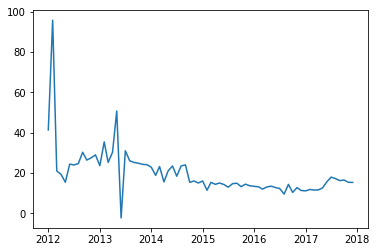

In [75]:
plt.plot(data_level_3.index.get_level_values(3).sort_values(), data_level_3['Sales 2'].sort_index())

In [216]:
def show_ts(cluster, brand_group, country, plot_id): 
    'displays the ts data for the specified group variables'
    data_level_1 = data[data.index.get_level_values(0) == cluster]
    data_level_2 = data_level_1[data_level_1.index.get_level_values(1) == brand_group]
    data_level_3 = data_level_2[data_level_2.index.get_level_values(2) == country]
    
    if len(data_level_3) == 0: 
        pass
    else: 
        plt.figure(plot_id)
        plt.plot(data_level_3.index.get_level_values(3).sort_values(), data_level_3['Sales 2'].sort_index())
        plt.title(cluster +' | ' + brand_group)
        plt.ylabel('Sales_2')

In [104]:
for date, new_df in data.groupby(level=['Cluster', 'Country']):
   ddf = new_df
   break

In [105]:
ddf

Investment 1  Investment 2  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   
                                    2017-04-01           NaN           NaN   
                                    2018-04-01           NaN           NaN   
                                    2012-08-01           NaN           NaN   
                                    2013-08-01           NaN           NaN   
                                    2014-08-01           NaN           NaN   
                                    2015-08-01           NaN           NaN   
                                    2016-08-01           NaN           NaN   
                                    2017-08-01           NaN           NaN   
                                    2018-08-01           NaN           NaN   
                                    2012-12-01           NaN           NaN   
                                    2013-12-01           NaN           NaN   
                                    2014-12-01           NaN           NaN   
                                    2015-12-01           NaN           NaN   
                                    2016-12-01           NaN           NaN   
                                    2017-12-01           NaN           NaN   
                                    2018-12-01           NaN           NaN   
                                    2012-02-01           NaN           NaN   
                                    2013-02-01           NaN           NaN   
                                    2014-02-01           NaN           NaN   
                                    2015-02-01           NaN           NaN   
                                    2016-02-01           NaN           NaN   
                                    2017-02-01           NaN           NaN   
                                    2018-02-01           NaN           NaN   
                                    2012-01-01           NaN           NaN   
                                    2013-01-01           NaN           NaN   
...                                                      ...           ...   
          Brand Group 97 Country 10 2017-03-01     -7.830601     -3.428317   
                                    2018-03-01    -18.815136     -6.011942   
                                    2012-05-01     -5.255733     -3.638205   
                                    2013-05-01     -9.473530     -5.993010   
                                    2014-05-01    -11.233373     -2.640298   
                                    2015-05-01    -30.391793      0.591466   
                                    2016-05-01    -23.800936     -1.319634   
                                    2017-05-01    -10.020179     -4.063894   
                                    2018-05-01    -16.545485     -5.294857   
                                    2012-11-01     -6.464833     -2.927263   
                                    2013-11-01     -9.259201     -8.889724   
                                    2014-11-01    -14.192118     -2.793099   
                                    2015-11-01    -32.618120    -12.376708   
                                    2016-11-01    -21.131958    -19.048424   
                                    2017-11-01    -13.711864     -9.339418   
                                    2018-11-01    -13.848931    -19.416225   
                                    2012-10-01     -5.577951     -3.642730   
                                    2013-10-01     -9.324667     -1.317120   
                                    2014-10-01    -13.484623     -5.64

In [100]:
# group countries by clusters 
data.index.get_level_values(['Cluster','Brand Group'])

KeyError: "Level ['Cluster', 'Brand Group'] not found"

In [101]:
data.index

MultiIndex(levels=[['Cluster 1', 'Cluster 10', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 7', 'Cluster 8', 'Cluster 9'], ['Brand Group 12', 'Brand Group 13', 'Brand Group 15', 'Brand Group 16', 'Brand Group 17', 'Brand Group 18', 'Brand Group 19', 'Brand Group 20', 'Brand Group 21', 'Brand Group 24', 'Brand Group 25', 'Brand Group 26', 'Brand Group 27', 'Brand Group 28', 'Brand Group 30', 'Brand Group 31', 'Brand Group 32', 'Brand Group 36', 'Brand Group 38', 'Brand Group 39', 'Brand Group 40', 'Brand Group 41', 'Brand Group 43', 'Brand Group 44', 'Brand Group 45', 'Brand Group 46', 'Brand Group 51', 'Brand Group 56', 'Brand Group 58', 'Brand Group 60', 'Brand Group 61', 'Brand Group 63', 'Brand Group 64', 'Brand Group 67', 'Brand Group 70', 'Brand Group 71', 'Brand Group 72', 'Brand Group 73', 'Brand Group 74', 'Brand Group 76', 'Brand Group 78', 'Brand Group 79', 'Brand Group 80', 'Brand Group 84', 'Brand Group 85', 'Brand Group 87', 'Brand Group 89', 'Brand Group 9

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f15f4911158> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

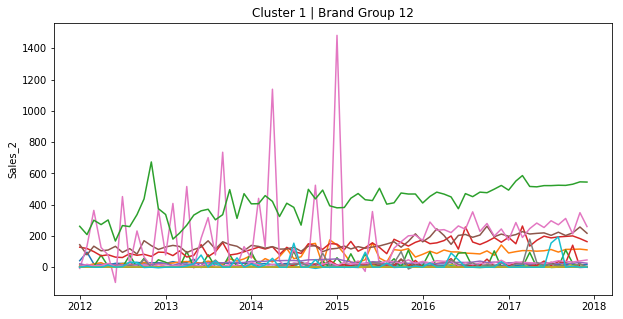

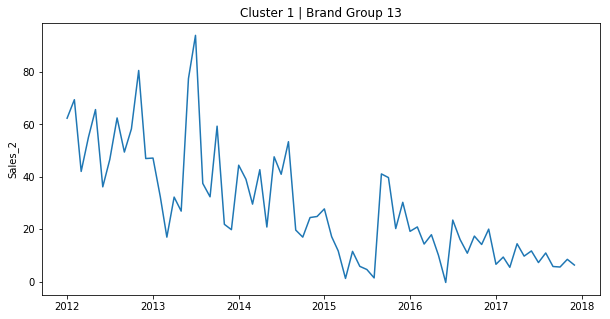

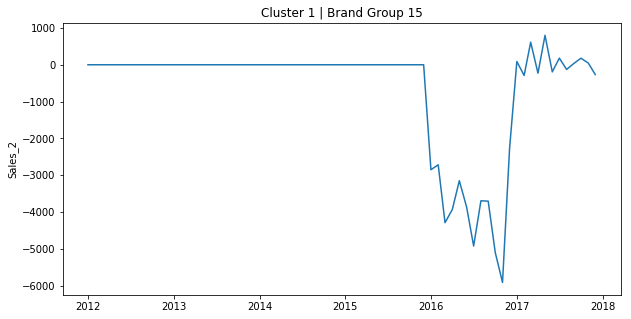

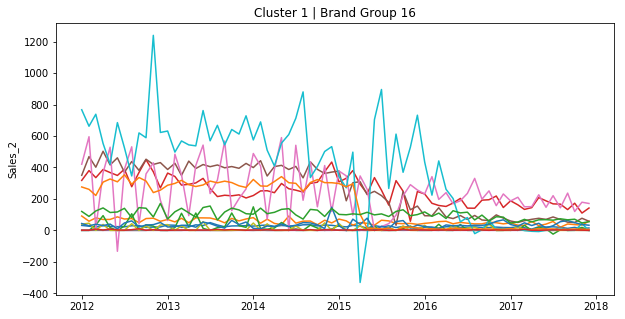

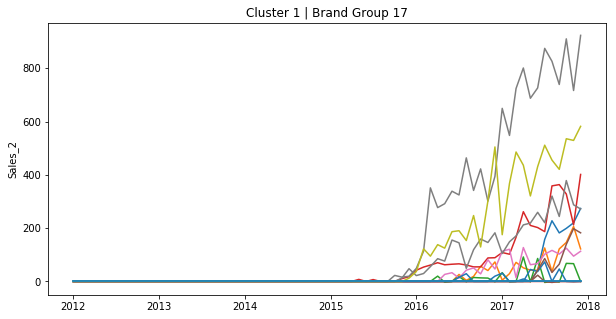

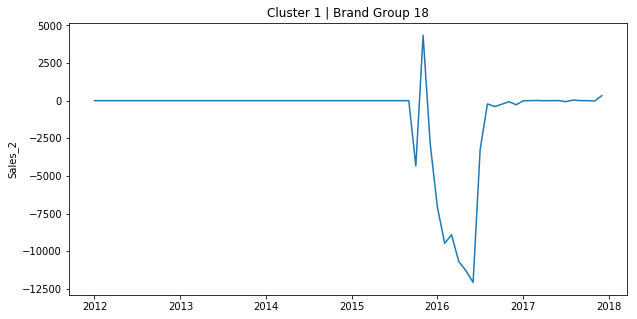

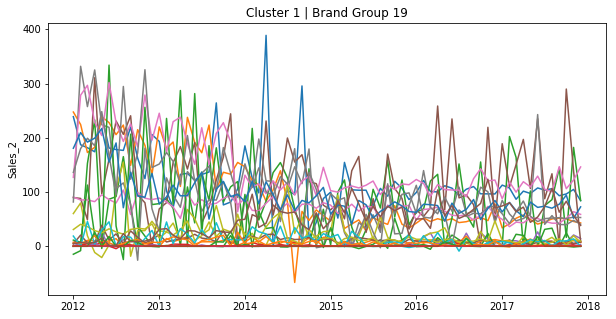

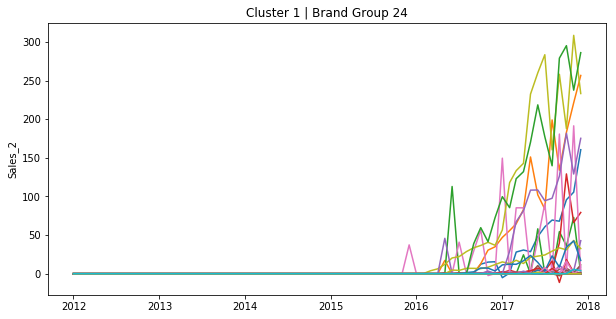

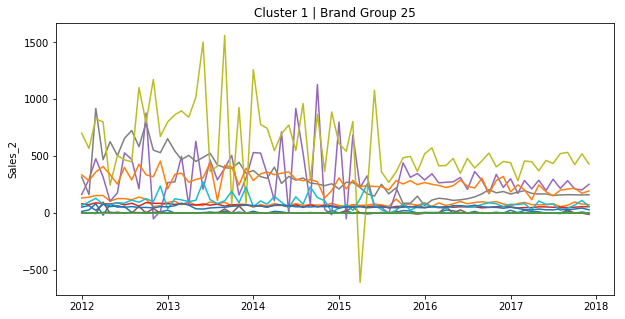

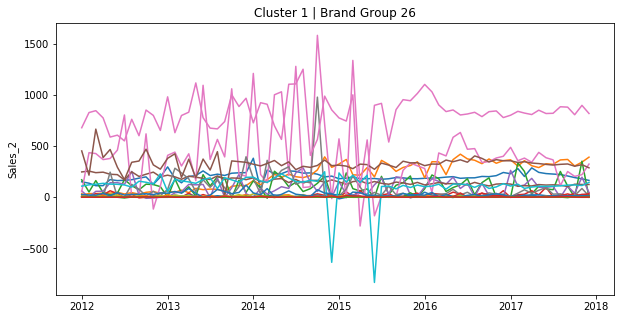

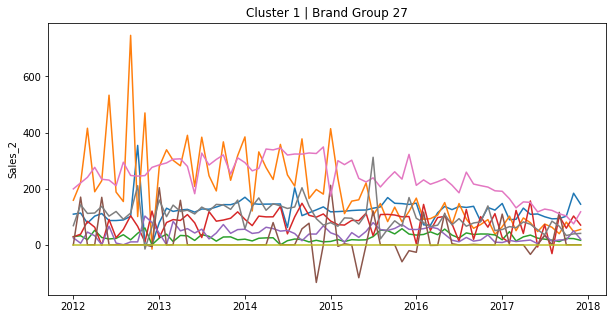

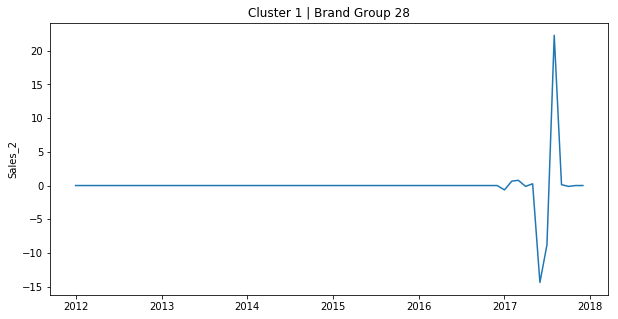

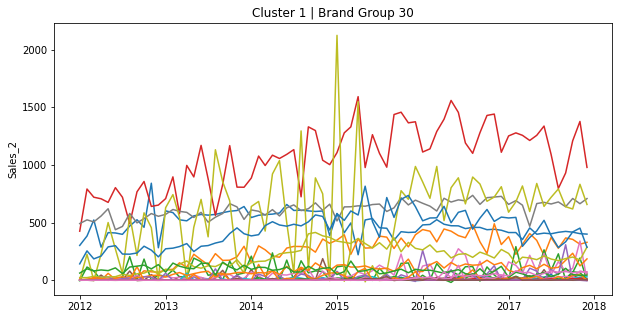

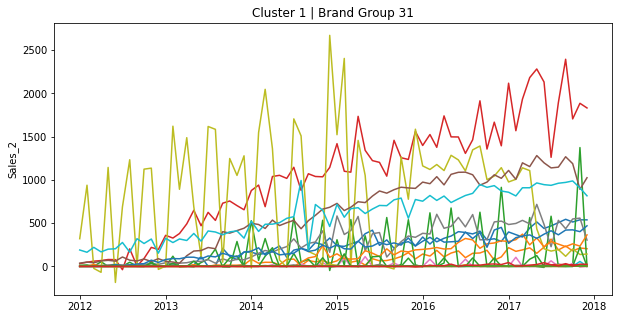

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [218]:
plot_id = 0


for cluster in clusters: 
    for brand_group in brand_groups:
        for country in countries:
            show_ts(cluster, brand_group, country, plot_id)
        plot_id += 1

In [209]:
plot_id

212

In [118]:
orig_data

Investment 1  Investment 2  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   
                                    2017-04-01           NaN           NaN   
                                    2018-04-01           NaN           NaN   
                                    2012-08-01           NaN           NaN   
                                    2013-08-01           NaN           NaN   
                                    2014-08-01           NaN           NaN   
                                    2015-08-01           NaN           NaN   
                                    2016-08-01           NaN           NaN   
                                    2017-08-01           NaN           NaN   
                                    2018-08-01           NaN           NaN   
                                    2012-12-01           NaN           NaN   
                                    2013-12-01           NaN           NaN   
                                    2014-12-01           NaN           NaN   
                                    2015-12-01           NaN           NaN   
                                    2016-12-01           NaN           NaN   
                                    2017-12-01           NaN           NaN   
                                    2018-12-01           NaN           NaN   
                                    2012-02-01           NaN           NaN   
                                    2013-02-01           NaN           NaN   
                                    2014-02-01           NaN           NaN   
                                    2015-02-01           NaN           NaN   
                                    2016-02-01           NaN           NaN   
                                    2017-02-01           NaN           NaN   
                                    2018-02-01           NaN           NaN   
                                    2012-01-01           NaN           NaN   
                                    2013-01-01           NaN           NaN   
...                                                      ...           ...   
Cluster 9 Brand Group 97 Country 57 2017-03-01   -195.155239   -117.824062   
                                    2018-03-01   -115.485123    -72.653299   
                                    2012-05-01   -176.882277    -62.858991   
                                    2013-05-01   -219.275550      0.000000   
                                    2014-05-01   -221.468305    -75.138422   
                                    2015-05-01   -200.125485    -42.978008   
                                    2016-05-01   -215.620957    -84.786546   
                                    2017-05-01    -92.388098   -153.200517   
                                    2018-05-01   -116.069858    -85.956016   
                                    2012-11-01   -121.332471    -23.389392   
                                    2013-11-01   -169.280724    -74.992238   
                                    2014-11-01   -230.824062    -33.914618   
                                    2015-11-01   -274.240621    -39.031048   
                                    2016-11-01   -151.884864    -72.799483   
                                    2017-11-01   -175.712807   -250.558862   
                                    2018-11-01   -122.977640    -60.601915   
                                    2012-10-01   -135.950841   -157.878396   
                                    2013-10-01   -184.045278    -57.157827   
                                    2014-10-01   -239.887451     -3.65

In [119]:
groups = pd.read_csv('../data/Data_Novartis_groups.csv')

In [144]:
country_clusters = {}
brand_clusters = {}
idx = 1

In [147]:
country_clusters = {}
brand_clusters = {}
idx = 1

for cluster in list(groups.groupby("Cluster")):
    sub_countries = np.unique(list(groups.groupby("Cluster"))[0][1].iloc[:, 2])
    sub_brand_groups = np.unique(list(groups.groupby("Cluster"))[0][1].iloc[:, 1])
    
    country_clusters[str(idx)] = sub_countries
    brand_clusters[str(idx)] = sub_brand_groups

    idx += 1

AttributeError: 'tuple' object has no attribute 'groupby'

In [164]:
country_clusters = {}
brand_clusters = {}
idx = 1

for cluster in list(groups.groupby("Cluster")):
    # np.unique(cluster[0][1].loc[:, 2])
    sub_countries = np.unique(cluster[1].iloc[:, 2])
    sub_brand_groups = np.unique(cluster[1].iloc[:, 1])
    
    country_clusters[str(idx)] = sub_countries
    brand_clusters[str(idx)] = sub_brand_groups

    idx += 1

In [166]:
country_clusters

{'1': array(['Country 10', 'Country 11', 'Country 12', 'Country 13',
        'Country 15', 'Country 18', 'Country 2', 'Country 21',
        'Country 24', 'Country 26', 'Country 27', 'Country 28',
        'Country 29', 'Country 3', 'Country 30', 'Country 32',
        'Country 33', 'Country 34', 'Country 35', 'Country 36',
        'Country 40', 'Country 41', 'Country 43', 'Country 44',
        'Country 46', 'Country 48', 'Country 49', 'Country 5',
        'Country 50', 'Country 54', 'Country 55', 'Country 56',
        'Country 58', 'Country 6', 'Country 7', 'Country 9'], dtype=object),
 '2': array(['Country 20', 'Country 37', 'Country 4', 'Country 42',
        'Country 53', 'Country 8'], dtype=object),
 '3': array(['Country 17'], dtype=object),
 '4': array(['Country 19'], dtype=object),
 '5': array(['Country 25'], dtype=object),
 '6': array(['Country 14', 'Country 16', 'Country 38', 'Country 52'],
       dtype=object),
 '7': array(['Country 47'], dtype=object),
 '8': array(['Country 51']

In [167]:
brand_clusters

{'1': array(['Brand Group 12', 'Brand Group 13', 'Brand Group 15',
        'Brand Group 16', 'Brand Group 17', 'Brand Group 18',
        'Brand Group 19', 'Brand Group 24', 'Brand Group 25',
        'Brand Group 26', 'Brand Group 27', 'Brand Group 28',
        'Brand Group 30', 'Brand Group 31', 'Brand Group 32',
        'Brand Group 36', 'Brand Group 38', 'Brand Group 39',
        'Brand Group 40', 'Brand Group 41', 'Brand Group 43',
        'Brand Group 44', 'Brand Group 45', 'Brand Group 46',
        'Brand Group 51', 'Brand Group 56', 'Brand Group 58',
        'Brand Group 63', 'Brand Group 67', 'Brand Group 70',
        'Brand Group 71', 'Brand Group 72', 'Brand Group 73',
        'Brand Group 76', 'Brand Group 78', 'Brand Group 79',
        'Brand Group 80', 'Brand Group 84', 'Brand Group 85',
        'Brand Group 87', 'Brand Group 89', 'Brand Group 90',
        'Brand Group 92', 'Brand Group 94', 'Brand Group 96',
        'Brand Group 97'], dtype=object),
 '2': array(['Brand Gro

In [184]:
brand_clusters_numbers = {}
for key, value in brand_clusters.items(): 
    new_value = [brand.replace('Brand Group ', '') for brand in value]
    brand_clusters_numbers['cluster_' + str(key)] = new_value

In [191]:
brand_groups

array(['Brand Group 12', 'Brand Group 13', 'Brand Group 15',
       'Brand Group 16', 'Brand Group 17', 'Brand Group 18',
       'Brand Group 19', 'Brand Group 20', 'Brand Group 21',
       'Brand Group 24', 'Brand Group 25', 'Brand Group 26',
       'Brand Group 27', 'Brand Group 28', 'Brand Group 30',
       'Brand Group 31', 'Brand Group 32', 'Brand Group 36',
       'Brand Group 38', 'Brand Group 39', 'Brand Group 40',
       'Brand Group 41', 'Brand Group 43', 'Brand Group 44',
       'Brand Group 45', 'Brand Group 46', 'Brand Group 51',
       'Brand Group 56', 'Brand Group 58', 'Brand Group 60',
       'Brand Group 61', 'Brand Group 63', 'Brand Group 64',
       'Brand Group 67', 'Brand Group 70', 'Brand Group 71',
       'Brand Group 72', 'Brand Group 73', 'Brand Group 74',
       'Brand Group 76', 'Brand Group 78', 'Brand Group 79',
       'Brand Group 80', 'Brand Group 84', 'Brand Group 85',
       'Brand Group 87', 'Brand Group 89', 'Brand Group 90',
       'Brand Group 92',

Brand Group 12
Country 10
plotting
Country 11
plotting
Country 12
plotting
Country 13
plotting
Country 14
Country 15
plotting
Country 16
Country 17
Country 18
plotting
Country 19
Country 2
plotting
Country 20
Country 21
plotting
Country 23
Country 24
plotting
Country 25
Country 26
plotting
Country 27
plotting
Country 28
plotting
Country 29
plotting
Country 3
plotting
Country 30
plotting
Country 32
plotting
Country 33
plotting
Country 34
plotting
Country 35
plotting
Country 36
plotting
Country 37
Country 38
Country 4
Country 40
plotting
Country 41
plotting
Country 42
Country 43
plotting
Country 44
plotting
Country 46
plotting
Country 47
Country 48
plotting
Country 49
plotting
Country 5
plotting
Country 50
plotting
Country 51
Country 52
Country 53
Country 54
plotting
Country 55
plotting
Country 56
plotting
Country 57
Country 58
plotting
Country 6
plotting
Country 7
plotting
Country 8
Country 9
plotting
Brand Group 13
Country 10
plotting
Country 11
plotting
Country 12
plotting
Country 13


Brand Group 26
Country 10
plotting
Country 11
plotting
Country 12
plotting
Country 13
plotting
Country 14
Country 15
plotting
Country 16
Country 17
Country 18
plotting
Country 19
Country 2
plotting
Country 20
Country 21
plotting
Country 23
Country 24
plotting
Country 25
Country 26
plotting
Country 27
plotting
Country 28
plotting
Country 29
plotting
Country 3
plotting
Country 30
plotting
Country 32
plotting
Country 33
plotting
Country 34
plotting
Country 35
plotting
Country 36
plotting
Country 37
Country 38
Country 4
Country 40
plotting
Country 41
plotting
Country 42
Country 43
plotting
Country 44
plotting
Country 46
plotting
Country 47
Country 48
plotting
Country 49
plotting
Country 5
plotting
Country 50
plotting
Country 51
Country 52
Country 53
Country 54
plotting
Country 55
plotting
Country 56
plotting
Country 57
Country 58
plotting
Country 6
plotting
Country 7
plotting
Country 8
Country 9
plotting
Brand Group 27
Country 10
plotting
Country 11
plotting
Country 12
plotting
Country 13


Country 19
Country 2
plotting
Country 20
Country 21
plotting
Country 23
Country 24
plotting
Country 25
Country 26
plotting
Country 27
plotting
Country 28
plotting
Country 29
plotting
Country 3
plotting
Country 30
plotting
Country 32
plotting
Country 33
plotting
Country 34
plotting
Country 35
plotting
Country 36
plotting
Country 37
Country 38
Country 4
Country 40
plotting
Country 41
plotting
Country 42
Country 43
plotting
Country 44
plotting
Country 46
plotting
Country 47
Country 48
plotting
Country 49
plotting
Country 5
plotting
Country 50
plotting
Country 51
Country 52
Country 53
Country 54
plotting
Country 55
plotting
Country 56
plotting
Country 57
Country 58
plotting
Country 6
plotting
Country 7
plotting
Country 8
Country 9
plotting
Brand Group 41
Country 10
plotting
Country 11
plotting
Country 12
plotting
Country 13
plotting
Country 14
Country 15
plotting
Country 16
Country 17
Country 18
plotting
Country 19
Country 2
plotting
Country 20
Country 21
plotting
Country 23
Country 24
plo

Country 30
plotting
Country 32
plotting
Country 33
plotting
Country 34
plotting
Country 35
plotting
Country 36
plotting
Country 37
Country 38
Country 4
Country 40
plotting
Country 41
plotting
Country 42
Country 43
plotting
Country 44
plotting
Country 46
plotting
Country 47
Country 48
plotting
Country 49
plotting
Country 5
plotting
Country 50
plotting
Country 51
Country 52
Country 53
Country 54
plotting
Country 55
plotting
Country 56
plotting
Country 57
Country 58
plotting
Country 6
plotting
Country 7
plotting
Country 8
Country 9
plotting
Brand Group 64
brand_group1not found
Brand Group 67
Country 10
plotting
Country 11
plotting
Country 12
plotting
Country 13
plotting
Country 14
Country 15
plotting
Country 16
Country 17
Country 18
plotting
Country 19
Country 2
plotting
Country 20
Country 21
plotting
Country 23
Country 24
plotting
Country 25
Country 26
plotting
Country 27
plotting
Country 28
plotting
Country 29
plotting
Country 3
plotting
Country 30
plotting
Country 32
plotting
Country 3

Country 37
Country 38
Country 4
Country 40
plotting
Country 41
plotting
Country 42
Country 43
plotting
Country 44
plotting
Country 46
plotting
Country 47
Country 48
plotting
Country 49
plotting
Country 5
plotting
Country 50
plotting
Country 51
Country 52
Country 53
Country 54
plotting
Country 55
plotting
Country 56
plotting
Country 57
Country 58
plotting
Country 6
plotting
Country 7
plotting
Country 8
Country 9
plotting
Brand Group 84
Country 10
plotting
Country 11
plotting
Country 12
plotting
Country 13
plotting
Country 14
Country 15
plotting
Country 16
Country 17
Country 18
plotting
Country 19
Country 2
plotting
Country 20
Country 21
plotting
Country 23
Country 24
plotting
Country 25
Country 26
plotting
Country 27
plotting
Country 28
plotting
Country 29
plotting
Country 3
plotting
Country 30
plotting
Country 32
plotting
Country 33
plotting
Country 34
plotting
Country 35
plotting
Country 36
plotting
Country 37
Country 38
Country 4
Country 40
plotting
Country 41
plotting
Country 42
Cou

Country 37
Country 38
Country 4
Country 40
plotting
Country 41
plotting
Country 42
Country 43
plotting
Country 44
plotting
Country 46
plotting
Country 47
Country 48
plotting
Country 49
plotting
Country 5
plotting
Country 50
plotting
Country 51
Country 52
Country 53
Country 54
plotting
Country 55
plotting
Country 56
plotting
Country 57
Country 58
plotting
Country 6
plotting
Country 7
plotting
Country 8
Country 9
plotting
Brand Group 98
brand_group1not found
Brand Group 12


KeyError: '10'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f15f4911158> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

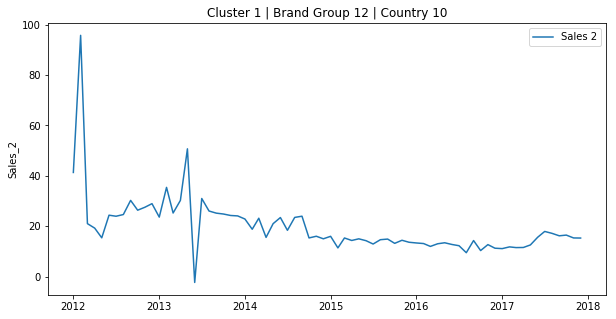

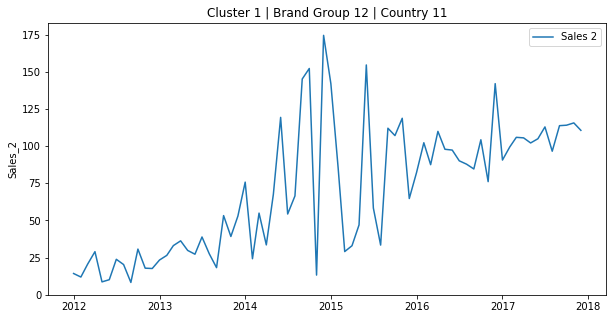

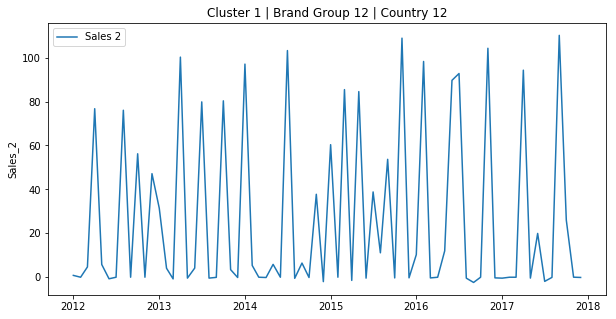

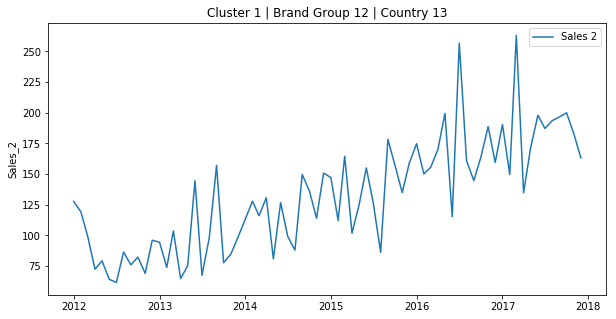

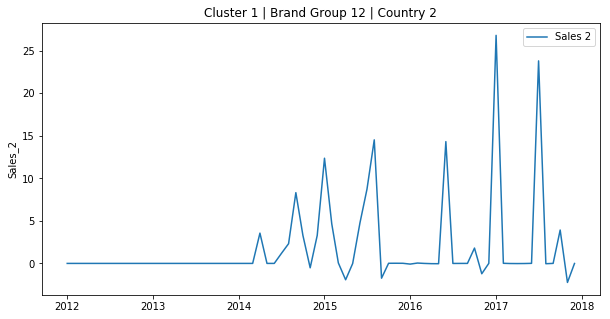

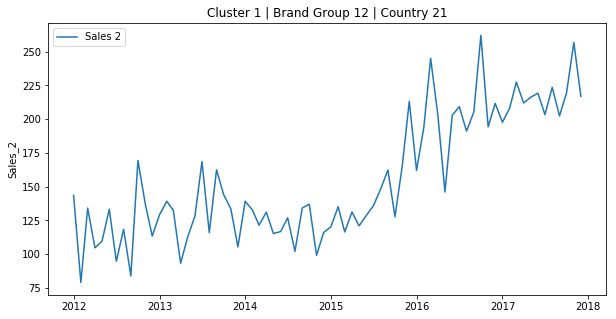

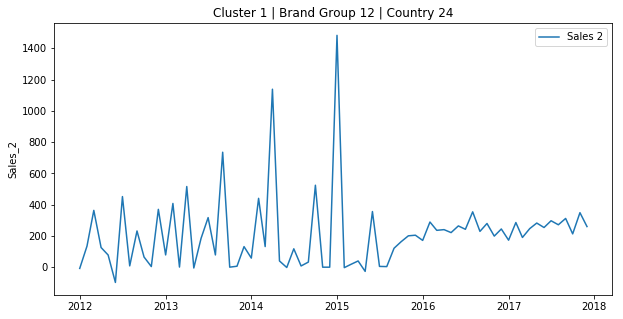

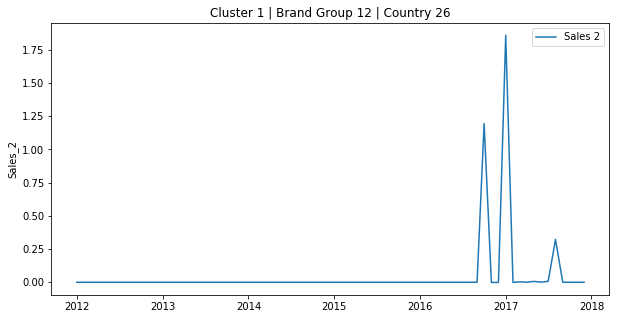

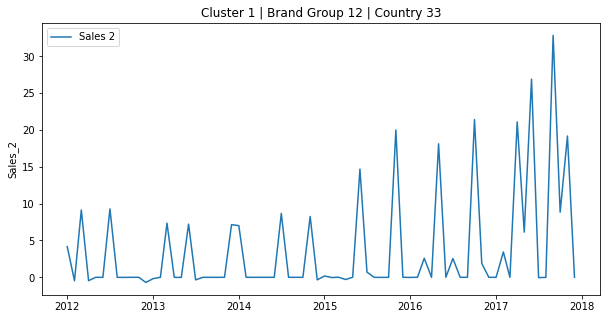

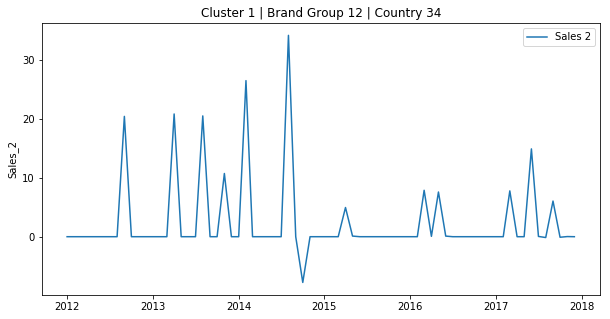

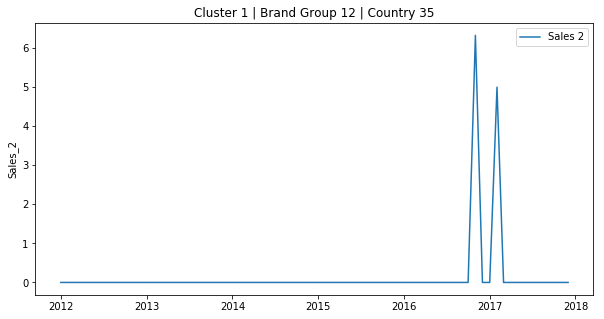

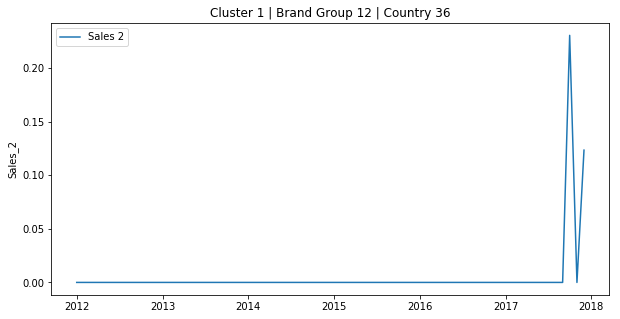

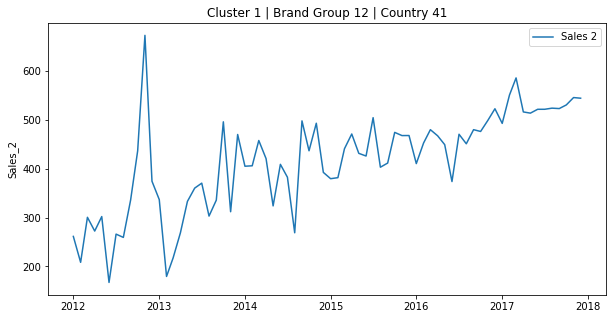

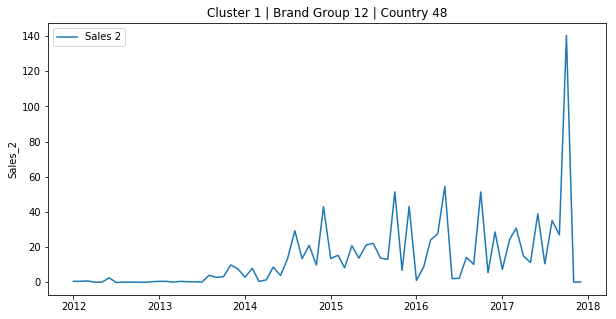

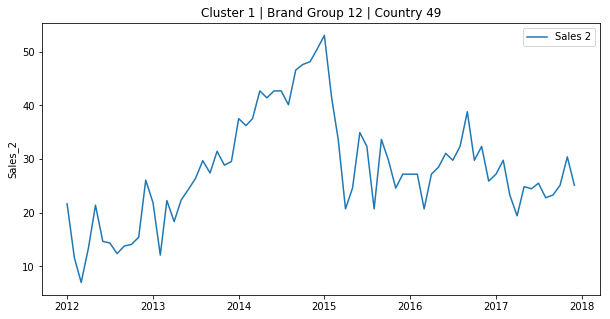

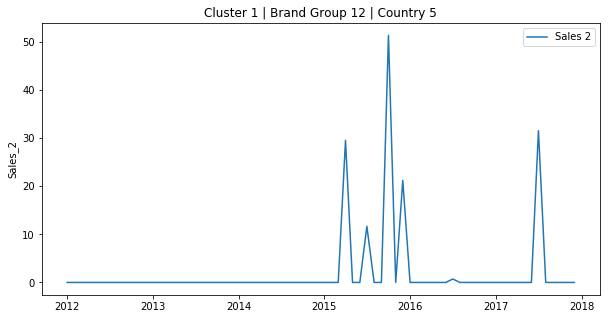

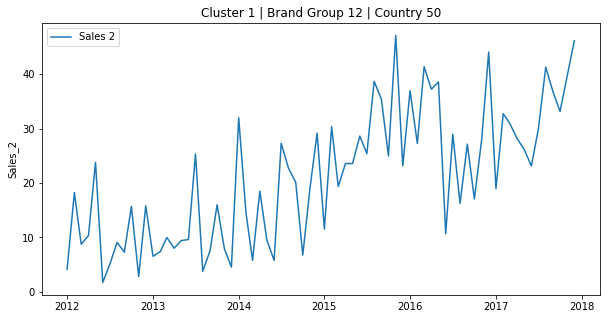

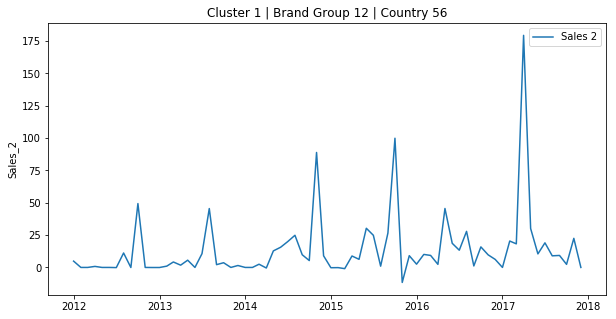

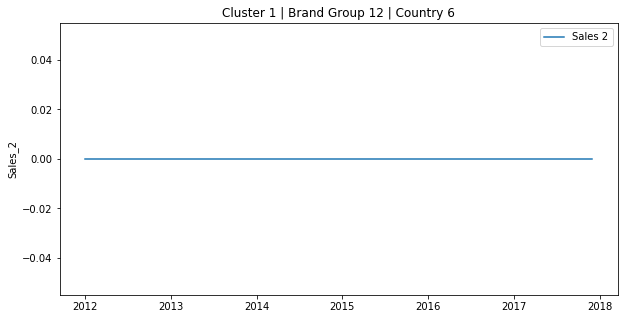

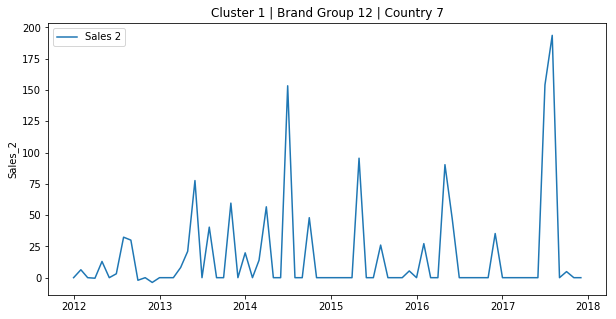

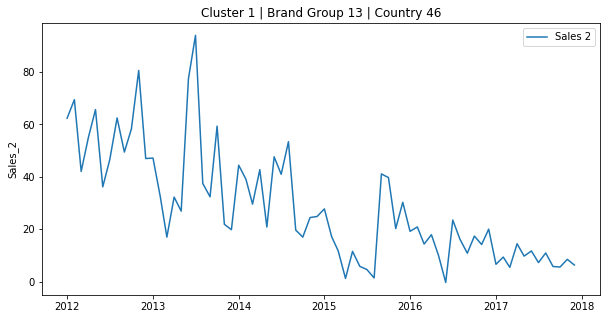

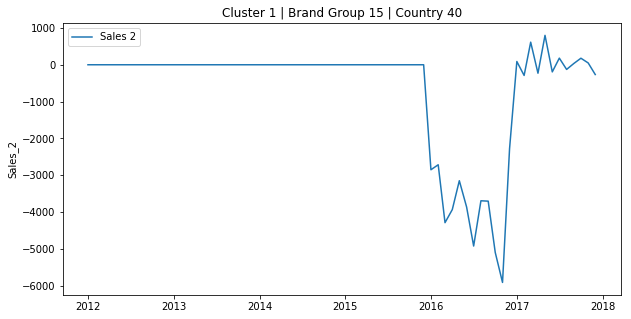

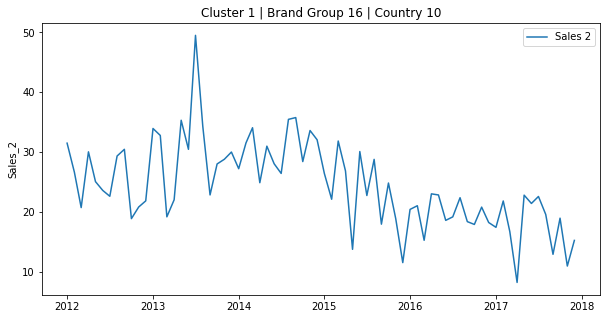

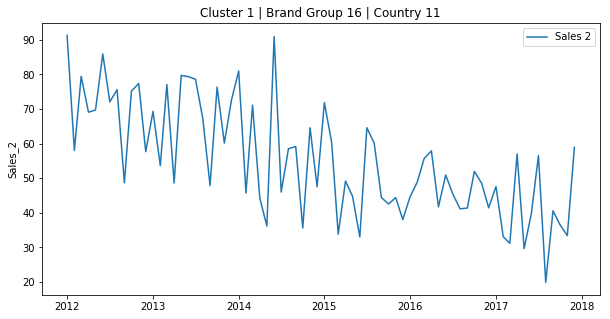

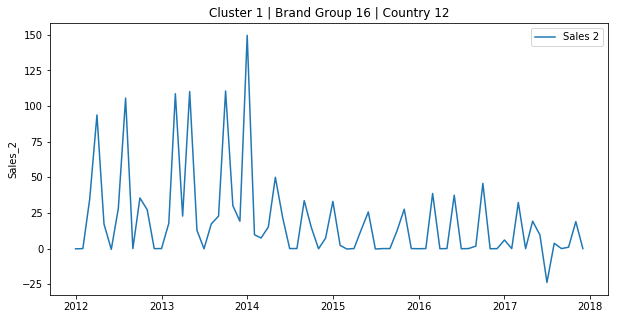

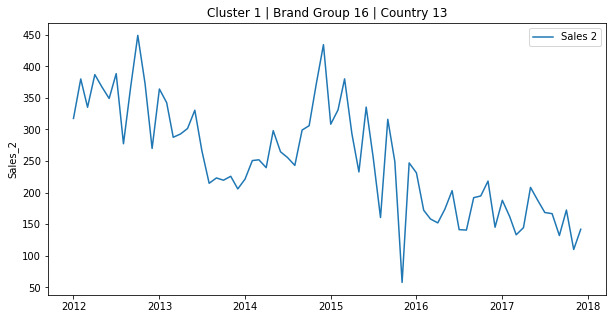

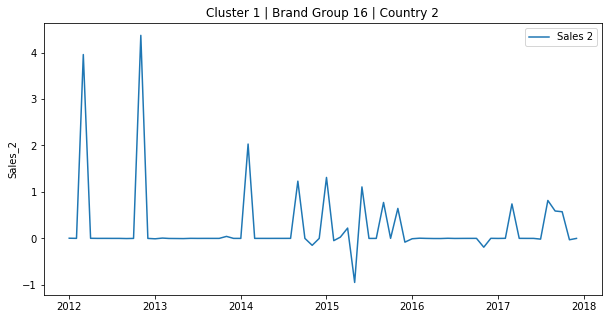

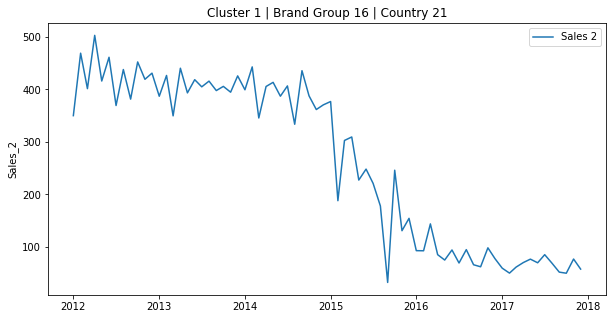

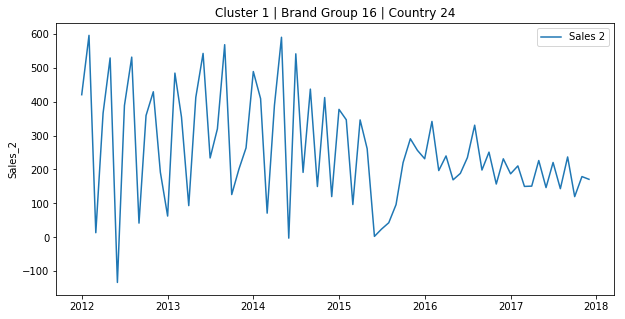

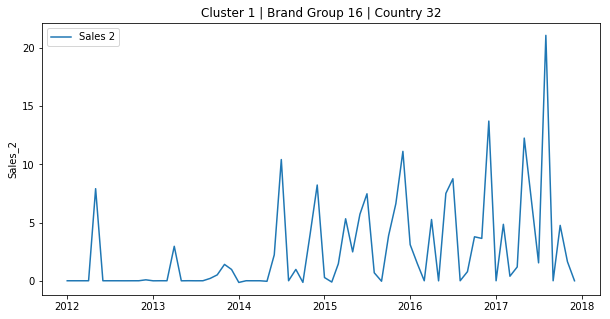

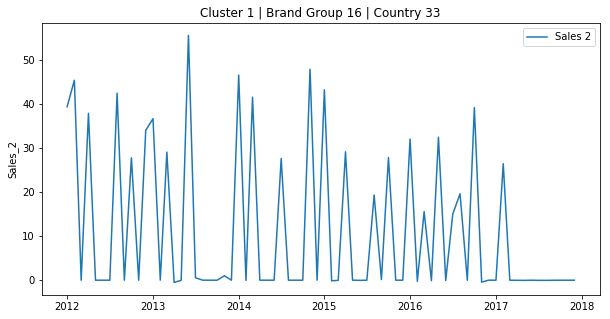

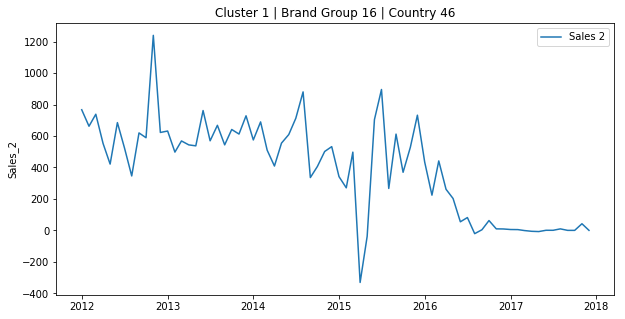

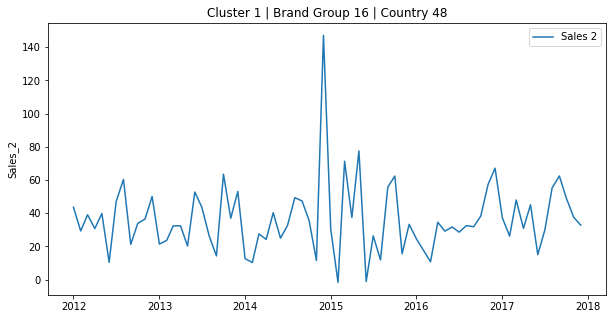

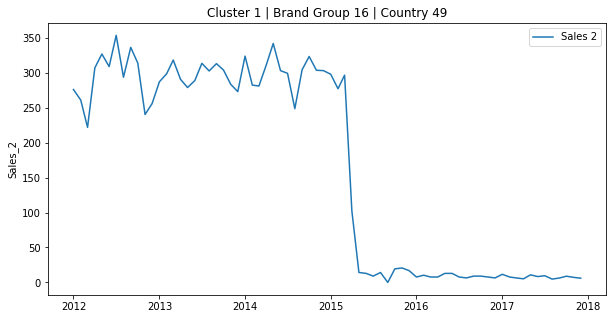

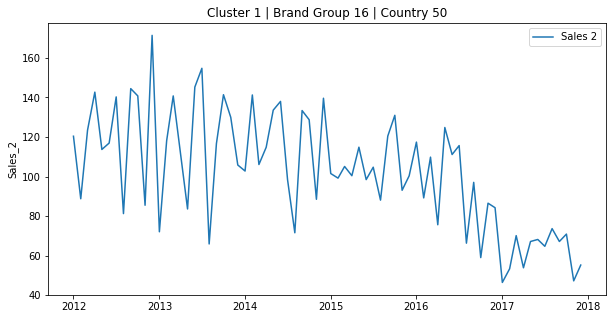

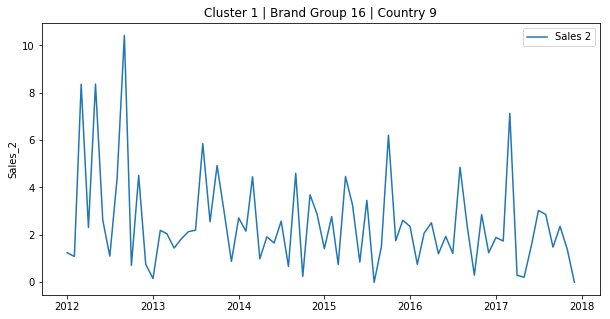

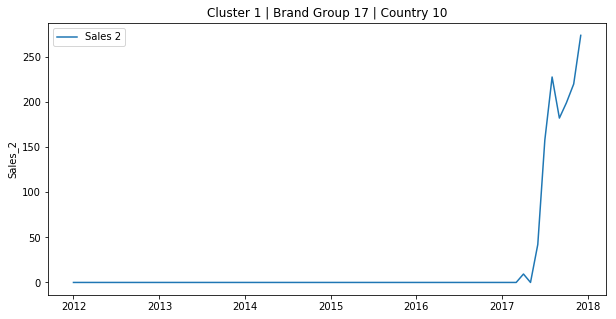

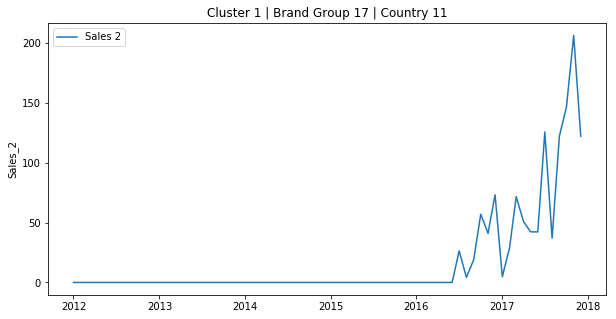

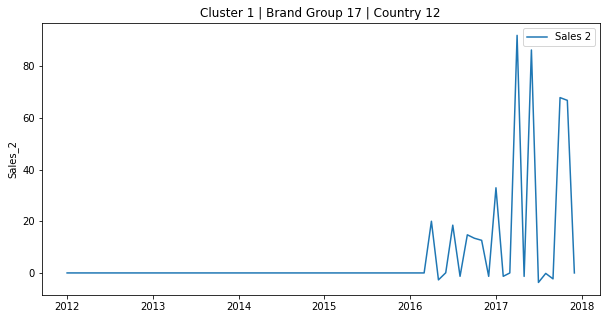

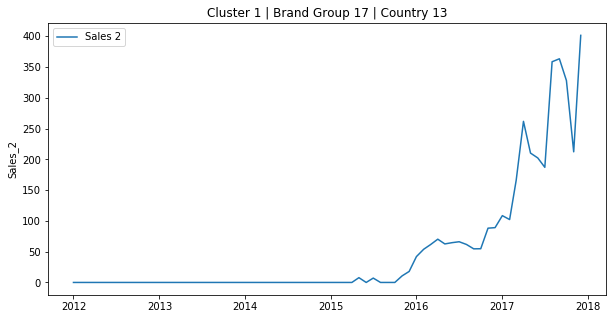

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [213]:
plot_id = 0

for cluster in clusters: 
    for brand_group in brand_groups:        
        # filter only brands that are present in this cluster     
        if brand_group in brand_clusters[cluster.replace("Cluster ", "")]:
            # filter only countries that have this data
            for country in countries: 
                if country in country_clusters[cluster.replace("Cluster ", "")]:
                    show_ts(cluster, brand_group, country, plot_id)
                else: 
                    pass
                plot_id += 1
        else: 
            print('brand_group' + cluster.replace("Cluster ", "") + 'not found')
            pass 

In [256]:
data.head()

Investment 1  Investment 2  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   

                                                Investment 3  Investment 4  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01      0.000000           0.0   
                                    2013-04-01      0.000000           0.0   
                                    2014-04-01     -0.682549           0.0   
                                    2015-04-01      0.000000           0.0   
                                    2016-04-01      0.000000           0.0   

                                                Investment 5  Investment 6  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   

                                                  Sales 1    Sales 2  year  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01  21.735670  19.227058  2012   
                                    2013-04-01  31.111031  30.221144  2013   
                                    2014-04-01  16.197425  15.555994  2014   
                                    2015-04-01  15.122488  14.335211  2015   
                                    2016-04-01  15.093484  13.025596  2016   

                                               month  month_num  
Cluster   Brand Group    Country    date                         
Cluster 1 Brand Group 12 Country 10 2012-04-01   Apr          4  
                                    2013-04-01   Apr          4  
                                    2014-04-01   Apr          4  
                                    2015-04-01   Apr          4  
                                    2016-04-01   Apr          4

### Monthly features

In [286]:
def basic_brand_features(data):
    '''
    function to aggregate features through countries based on brand
    Not using rolling aggregation but just stand-alone stats
    
    input: standardised dataframe
    output: pre-defined dataframe 
    '''
    i = 0
    function_types = ['Investment 1', 'Investment 2', 'Investment 3', 'Investment 4', 'Investment 5', 'Investment 6',
                  'Sales 1', 'Sales 2']

    # create new_df to fill in informations
    new_df = pd.DataFrame(columns = ['Cluster', 'Brand Group', 'date', 'Investment 1 mean', 'Investment 2 mean', 'Investment 3 mean', 'Investment 4 mean',
                                     'Investment 5 mean', 'Investment 6 mean', 'Sales 1 mean', 'Sales 2 mean', 
                                     'Investment 1 std', 'Investment 2 std', 'Investment 3 std', 'Investment 4 std',
                                     'Investment 5 std', 'Investment 6 std', 'Sales 1 std', 'Sales 2 std', 
                                     'Investment 1 var', 'Investment 2 var', 'Investment 3 var', 'Investment 4 var', 
                                     'Investment 5 var', 'Investment 6 var', 'Sales 1 var', 'Sales 2 var',
                                     'Investment 1 median', 'Investment 2 median', 'Investment 3 median', 
                                     'Investment 4 median', 'Investment 5 median', 'Investment 6 median',
                                     'Sales 1 median', 'Sales 2 median', 
                                     'Investment 1 lq', 'Investment 2 lq', 'Investment 3 lq', 'Investment 4 lq',
                                     'Investment 5 lq', 'Investment 6 lq', 'Sales 1 lq', 'Sales 2 lq',
                                     'Investment 1 uq', 'Investment 2 uq', 'Investment 3 uq', 'Investment 4 uq',
                                     'Investment 5 uq', 'Investment 6 uq', 'Sales 1 uq', 'Sales 2 uq', 
                                     'Investment 1 iqr', 'Investment 2 iqr', 'Investment 3 iqr', 'Investment 4 iqr',
                                     'Investment 5 iqr', 'Investment 6 iqr', 'Sales 1 iqr', 'Sales 2 iqr', 
                                     'Investment 1 min', 'Investment 2 min', 'Investment 3 min', 'Investment 4 min', 
                                     'Investment 5 min', 'Investment 6 min', 'Sales 1 min', 'Sales 2 min', 
                                     'Investment 1 max', 'Investment 2 max', 'Investment 3 max', 'Investment 4 max',
                                     'Investment 5 max', 'Investment 6 max', 'Sales 1 max', 'Sales 2 max'                                     
                                    ])
    
    for brand in brand_groups:
        df = data[data.index.get_level_values(1) == brand]
        for time_period in dates:
            df = df[df.index.get_level_values(3) == time_period]
            
            clusters = np.unique(df.index.get_level_values(0))
            for cluster in clusters: 
                df = df[df.index.get_level_values(0) == cluster]
                
                
                basic_features = []
                for func in function_types:
                    basic_features.append(df[func].mean(skipna=True))
                    basic_features.append(df[func].std(skipna=True))
                    basic_features.append(df[func].var(skipna=True))
                    basic_features.append(df[func].median(skipna=True))
                    basic_features.append(df[func].quantile(0.25))
                    basic_features.append(df[func].quantile(0.75))
                    basic_features.append(df[func].quantile(0.75) - df[func].quantile(0.25))
                    basic_features.append(df[func].min(skipna=True))
                    basic_features.append(df[func].max(skipna=True))

                new_row = [cluster, brand, time_period] + basic_features
                # new_row = np.nan_to_num(new_row)
                new_df.loc[i] = new_row
                i += 1
    new_df = new_df.set_index(['Cluster', 'Brand Group', 'date'])            
    return new_df

In [311]:
xyz = basic_brand_features(data)

In [313]:
xyz.set_index(['Cluster', 'Brand Group', 'date'])

Investment 1 mean  Investment 2 mean  \
Cluster    Brand Group    date                                               
Cluster 1  Brand Group 12 2012-01-01          -3.208618           6.344800   
Cluster 10 Brand Group 12 2012-01-01                NaN                NaN   
Cluster 2  Brand Group 12 2012-01-01                NaN                NaN   
Cluster 3  Brand Group 12 2012-01-01                NaN                NaN   
Cluster 4  Brand Group 12 2012-01-01                NaN                NaN   
Cluster 5  Brand Group 12 2012-01-01                NaN                NaN   
Cluster 7  Brand Group 12 2012-01-01                NaN                NaN   
Cluster 8  Brand Group 12 2012-01-01                NaN                NaN   
Cluster 9  Brand Group 12 2012-01-01                NaN                NaN   
Cluster 1  Brand Group 13 2012-01-01                NaN                NaN   
Cluster 10 Brand Group 13 2012-01-01                NaN                NaN   
Cluster 1  Brand Group 15 2012-01-01           0.000000                NaN   
           Brand Group 16 2012-01-01                NaN                NaN   
Cluster 10 Brand Group 16 2012-01-01                NaN                NaN   
Cluster 2  Brand Group 16 2012-01-01                NaN                NaN   
Cluster 4  Brand Group 16 2012-01-01                NaN                NaN   
Cluster 8  Brand Group 16 2012-01-01                NaN                NaN   
Cluster 1  Brand Group 17 2012-01-01           0.000000           0.000000   
Cluster 10 Brand Group 17 2012-01-01                NaN                NaN   
Cluster 2  Brand Group 17 2012-01-01                NaN                NaN   
Cluster 3  Brand Group 17 2012-01-01                NaN                NaN   
Cluster 4  Brand Group 17 2012-01-01                NaN                NaN   
Cluster 5  Brand Group 17 2012-01-01                NaN                NaN   
Cluster 8  Brand Group 17 2012-01-01                NaN                NaN   
Cluster 9  Brand Group 17 2012-01-01                NaN                NaN   
Cluster 1  Brand Group 18 2012-01-01                NaN                NaN   
           Brand Group 19 2012-01-01          -2.331916           3.210157   
Cluster 10 Brand Group 19 2012-01-01                NaN                NaN   
Cluster 2  Brand Group 19 2012-01-01                NaN                NaN   
Cluster 3  Brand Group 19 2012-01-01                NaN                NaN   
...                                                 ...                ...   
Cluster 8  Brand Group 92 2012-01-01                NaN                NaN   
Cluster 9  Brand Group 92 2012-01-01                NaN                NaN   
Cluster 1  Brand Group 94 2012-01-01          -2.613362           4.576777   
Cluster 10 Brand Group 94 2012-01-01                NaN                NaN   
Cluster 2  Brand Group 94 2012-01-01                NaN                NaN   
Cluster 3  Brand Group 94 2012-01-01                NaN                NaN   
Cluster 4  Brand Group 94 2012-01-01                NaN                NaN   
Cluster 5  Brand Group 94 2012-01-01                NaN                NaN   
Cluster 7  Brand Group 94 2012-01-01                NaN                NaN   
Cluster 8  Brand Group 94 2012-01-01                NaN                NaN   
Cluster 1  Brand Group 96 2012-01-01           0.000000           0.000000   
Cluster 10 Brand Group 96 2012-01-01                NaN                NaN   
Cluster 2  Brand Group 96 2012-01-01                NaN                NaN   
Cluster 3  Brand Group 96 2012-01-01                NaN                NaN   
Cluster 4  Brand Group 96 2012-01-01                NaN                NaN   
Cluster 5  Brand Group 96 2012-01-01                NaN                NaN   
Cluster 7  Brand Group 96 2012-01-01                NaN                NaN   
Cluster 8  Brand Group 96 2012-01-01                NaN                NaN   
Cluster 9  Brand Group 96 2012-01-01                NaN     

In [267]:
new_df = pd.DataFrame(columns = ['Cluster', 'Brand Group', 'date', 'Investment 1 mean', 'Investment 2 mean', 'Investment 3 mean', 'Investment 4 mean',
                                     'Investment 5 mean', 'Investment 6 mean', 'Sales 1 mean', 'Sales 2 mean', 
                                     'Investment 1 std', 'Investment 2 std', 'Investment 3 std', 'Investment 4 std',
                                     'Investment 5 std', 'Investment 6 std', 'Sales 1 std', 'Sales 2 std', 
                                     'Investment 1 var', 'Investment 2 var', 'Investment 3 var', 'Investment 4 var', 
                                     'Investment 5 var', 'Investment 6 var', 'Sales 1 var', 'Sales 2 var',
                                     'Investment 1 median', 'Investment 2 median', 'Investment 3 median', 
                                     'Investment 4 median', 'Investment 5 median', 'Investment 6 median',
                                     'Sales 1 median', 'Sales 2 median', 
                                     'Investment 1 lq', 'Investment 2 lq', 'Investment 3 lq', 'Investment 4 lq',
                                     'Investment 5 lq', 'Investment 6 lq', 'Sales 1 lq', 'Sales 2 lq',
                                     'Investment 1 uq', 'Investment 2 uq', 'Investment 3 uq', 'Investment 4 uq',
                                     'Investment 5 uq', 'Investment 6 uq', 'Sales 1 uq', 'Sales 2 uq', 
                                     'Investment 1 iqr', 'Investment 2 iqr', 'Investment 3 iqr', 'Investment 4 iqr',
                                     'Investment 5 iqr', 'Investment 6 iqr', 'Sales 1 iqr', 'Sales 2 iqr', 
                                     'Investment 1 min', 'Investment 2 min', 'Investment 3 min', 'Investment 4 min', 
                                     'Investment 5 min', 'Investment 6 min', 'Sales 1 min', 'Sales 2 min', 
                                     'Investment 1 max', 'Investment 2 max', 'Investment 3 max', 'Investment 4 max',
                                     'Investment 5 max', 'Investment 6 max', 'Sales 1 max', 'Sales 2 max'                                     
                                    ])

    

In [271]:
new_df.loc[0] = ['Cluster 1', 'Brand Group 12', np.datetime64('2012-01-01T00:00:00.000000000'), -3.2086181695454545, 6.344799915703114, 40.256485970306244, 0.0, -2.916082309, 0.0, 2.916082309, -21.09333334, 0.0, -3.495279721666667, 5.543036882759132, 30.725257883628075, 0.0, -6.463659852, 0.0, 6.463659852, -14.16266667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.015911437555555557, 0.07587988790208701, 0.005757757388033291, 0.0, -0.0003770655, 0.0, 0.0003770655, -0.301333333, 0.056775318, 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', -1.5952074505999998, 2.262238602285351, 5.1177234936699785, 0.0, -3.155629626, 0.0, 3.155629626, -4.820407627, 0.0, 35.066792050736844, 74.00090105288625, 5476.133356639062, 0.891862076, 0.0, 19.932133905, 19.932133905, -8.426759534, 262.7626667, 30.820448074, 68.35324467401631, 4672.166057465938, 0.6547715574999999, 0.0, 16.096952577499998, 16.096952577499998, -8.047563136, 261.3688735] 

In [272]:
new_df

Cluster     Brand Group       date  Investment 1 mean  Investment 2 mean  \
0  Cluster 1  Brand Group 12 2012-01-01          -3.208618             6.3448   

   Investment 3 mean  Investment 4 mean  Investment 5 mean  Investment 6 mean  \
0          40.256486                0.0          -2.916082                0.0   

   Sales 1 mean     ...       Sales 1 min  Sales 2 min  Investment 1 max  \
0      2.916082     ...        262.762667    30.820448         68.353245   

   Investment 2 max  Investment 3 max  Investment 4 max  Investment 5 max  \
0       4672.166057          0.654772               0.0         16.096953   

   Investment 6 max  Sales 1 max  Sales 2 max  
0         16.096953    -8.047563   261.368874  

[1 rows x 75 columns]

In [ ]:
'Investment 1 max', 'Investment 2 max', 'Investment 3 max', 'Investment 4 max', 'Investment 5 max',
'Investment 6 max', 'Sales 1 max', 'Sales 2 max'

In [ ]:
basic_features = []

for func in function_types:
    basic_features.append(df[func].cummean(skipna=True))
    basic_features.append(df[func].std(skipna=True))
    basic_features.append(df[func].var(skipna=True))
    basic_features.append(df[func].median(skipna=True))
    basic_features.append(df[func].quantile(0.25))
    basic_features.append(df[func].quantile(0.75))
    basic_features.append(df[func].quantile(0.75) - df[func].quantile(0.25))
    basic_features.append(df[func].min(skipna=True))
    basic_features.append(df[func].max(skipna=True))
    

In [253]:
func_mean = []
func_std = []
func_var = []
func_median = []
func_lq = []
func_uq = []
func_iqr = []
func_min = []
func_max = []


for func in function_types:
    func_mean.append(df[func].mean(skipna=True))
    func_std.append(df[func].std(skipna=True))
    func_var.append(df[func].var(skipna=True))
    func_median.append(df[func].median(skipna=True))
    func_lower_quantile.append(df[func].quantile(0.25))
    func_upper_quantile.append(df[func].quantile(0.75))
    func_iqr.append(df[func].quantile(0.75) - df[func].quantile(0.25))

    func_min.append(df[func].min(skipna=True))
    func_max.append(df[func].max(skipna=True))
    

In [219]:
dates = np.unique(data.index.get_level_values(3))
print(dates[:10])
print(' ')
print('Total number of dates: ' + str(len(dates)))

['2012-01-01T00:00:00.000000000' '2012-02-01T00:00:00.000000000'
 '2012-03-01T00:00:00.000000000' '2012-04-01T00:00:00.000000000'
 '2012-05-01T00:00:00.000000000' '2012-06-01T00:00:00.000000000'
 '2012-07-01T00:00:00.000000000' '2012-08-01T00:00:00.000000000'
 '2012-09-01T00:00:00.000000000' '2012-10-01T00:00:00.000000000']
 
Total number of dates: 84


In [224]:
simple_data = data.copy()
simple_data = simple_data.reset_index()

#### By Brand

In [220]:
brand_monthly_features = pd.DataFrame(columns=['Brand Group', 'date', 'mean_invest_1', 'mean_invest_2',
                                               'mean_invest_3', 'mean_invest_4', 'mean_invest_5', 'mean_invest_6',
                                               'mean_sales_1', 'mean_sales_2', 'sales_2_std', 'sales_2_min',
                                               'sales_2_max'])

In [259]:
function_types = ['Investment 1', 'Investment 2', 'Investment 3', 'Investment 4', 'Investment 5', 'Investment 6',
                  'Sales 1', 'Sales 2']

for brand in brand_groups:
    df = data[data.index.get_level_values(1) == brand]
    for time_period in dates:
        df = df[df.index.get_level_values(3) == time_period]
        
        
        
        break
    break

In [241]:
# df = data[data.index.get_level_values(3) == '2012-01-01T00:00:00.000000000']


df = df.reset_index()

In [293]:
def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [308]:
a = data.groupby("Brand Group").cumsum()
a.head(100)

Investment 1  Investment 2  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   
                                    2017-04-01           NaN           NaN   
                                    2018-04-01           NaN           NaN   
                                    2012-08-01           NaN           NaN   
                                    2013-08-01           NaN           NaN   
                                    2014-08-01           NaN           NaN   
                                    2015-08-01           NaN           NaN   
                                    2016-08-01           NaN           NaN   
                                    2017-08-01           NaN           NaN   
                                    2018-08-01           NaN           NaN   
                                    2012-12-01           NaN           NaN   
                                    2013-12-01           NaN           NaN   
                                    2014-12-01           NaN           NaN   
                                    2015-12-01           NaN           NaN   
                                    2016-12-01           NaN           NaN   
                                    2017-12-01           NaN           NaN   
                                    2018-12-01           NaN           NaN   
                                    2012-02-01           NaN           NaN   
                                    2013-02-01           NaN           NaN   
                                    2014-02-01           NaN           NaN   
                                    2015-02-01           NaN           NaN   
                                    2016-02-01           NaN           NaN   
                                    2017-02-01           NaN           NaN   
                                    2018-02-01           NaN           NaN   
                                    2012-01-01           NaN           NaN   
                                    2013-01-01           NaN           NaN   
...                                                      ...           ...   
                                    2012-10-01           NaN           NaN   
                                    2013-10-01           NaN           NaN   
                                    2014-10-01           NaN           NaN   
                                    2015-10-01           NaN           NaN   
                                    2016-10-01           NaN           NaN   
                                    2017-10-01           NaN           NaN   
                                    2018-10-01           NaN           NaN   
                                    2012-09-01           NaN           NaN   
                                    2013-09-01           NaN           NaN   
                                    2014-09-01           NaN           NaN   
                                    2015-09-01           NaN           NaN   
                                    2016-09-01           NaN           NaN   
                                    2017-09-01           NaN           NaN   
                                    2018-09-01           NaN           NaN   
                         Country 11 2012-04-01     -2.887832           NaN   
                                    2013-04-01     -6.886294           NaN   
                                    2014-04-01     -9.493986           NaN   
                                    2015-04-01    -12.014755           NaN   
                                    2016-04-01    -15.283063          

In [301]:
sub_df = data[data.index.get_level_values(1) == 'Brand Group 12']
sub_df[sub_df.index.get_level_values(2) == 'Country 10']

Investment 1  Investment 2  \
Cluster   Brand Group    Country    date                                     
Cluster 1 Brand Group 12 Country 10 2012-04-01           NaN           NaN   
                                    2013-04-01           NaN           NaN   
                                    2014-04-01           NaN           NaN   
                                    2015-04-01           NaN           NaN   
                                    2016-04-01           NaN           NaN   
                                    2017-04-01           NaN           NaN   
                                    2018-04-01           NaN           NaN   
                                    2012-08-01           NaN           NaN   
                                    2013-08-01           NaN           NaN   
                                    2014-08-01           NaN           NaN   
                                    2015-08-01           NaN           NaN   
                                    2016-08-01           NaN           NaN   
                                    2017-08-01           NaN           NaN   
                                    2018-08-01           NaN           NaN   
                                    2012-12-01           NaN           NaN   
                                    2013-12-01           NaN           NaN   
                                    2014-12-01           NaN           NaN   
                                    2015-12-01           NaN           NaN   
                                    2016-12-01           NaN           NaN   
                                    2017-12-01           NaN           NaN   
                                    2018-12-01           NaN           NaN   
                                    2012-02-01           NaN           NaN   
                                    2013-02-01           NaN           NaN   
                                    2014-02-01           NaN           NaN   
                                    2015-02-01           NaN           NaN   
                                    2016-02-01           NaN           NaN   
                                    2017-02-01           NaN           NaN   
                                    2018-02-01           NaN           NaN   
                                    2012-01-01           NaN           NaN   
                                    2013-01-01           NaN           NaN   
...                                                      ...           ...   
                                    2017-03-01           NaN           NaN   
                                    2018-03-01           NaN           NaN   
                                    2012-05-01           NaN           NaN   
                                    2013-05-01           NaN           NaN   
                                    2014-05-01           NaN           NaN   
                                    2015-05-01           NaN           NaN   
                                    2016-05-01           NaN           NaN   
                                    2017-05-01           NaN           NaN   
                                    2018-05-01           NaN           NaN   
                                    2012-11-01           NaN           NaN   
                                    2013-11-01           NaN           NaN   
                                    2014-11-01           NaN           NaN   
                                    2015-11-01           NaN           NaN   
                                    2016-11-01           NaN           NaN   
                                    2017-11-01           NaN           NaN   
                                    2018-11-01           NaN           NaN   
                                    2012-10-01           NaN           NaN   
                                    2013-10-01           NaN           NaN   
                                    2014-10-01           NaN          

In [292]:
data.rolling(30).sum()

TypeError: cannot handle this type -> object

In [255]:
func_iqr

[38.840759385,
 14.627308282500001,
 0.0,
 0.002238453,
 nan,
 17.474226804500002,
 249.697618941,
 239.352042575]

In [238]:
function_types

['Investment 1',
 'Investment 2',
 'Investment 3',
 'Investment 4',
 'Investment 5',
 'Sales 1',
 'Sales 2']

In [288]:
df['Investment 1'].cumquantile(0.75)

AttributeError: 'Series' object has no attribute 'cumquantile'

In [252]:
df['Investment 1'].quantile(0.25)

-38.840759385

array(['Cluster 1', 'Cluster 10', 'Cluster 2', 'Cluster 3', 'Cluster 4',
       'Cluster 5', 'Cluster 7', 'Cluster 8', 'Cluster 9'], dtype=object)

In [310]:
df

Investment 1  Investment 2  \
Cluster    Brand Group    Country    date                                     
Cluster 1  Brand Group 12 Country 10 2012-01-01           NaN           NaN   
                          Country 11 2012-01-01     -1.929236           NaN   
                          Country 12 2012-01-01     -3.902929     -0.184080   
                          Country 13 2012-01-01           NaN      0.000000   
                          Country 2  2012-01-01           NaN           NaN   
                          Country 21 2012-01-01      0.000000    -10.647111   
                          Country 24 2012-01-01     -7.092079     -6.463660   
                          Country 26 2012-01-01           NaN      0.000000   
                          Country 33 2012-01-01     -1.277223      0.000000   
                          Country 34 2012-01-01           NaN           NaN   
                          Country 35 2012-01-01      0.000000           NaN   
                          Country 36 2012-01-01           NaN           NaN   
                          Country 41 2012-01-01    -21.093333    -14.162667   
                          Country 48 2012-01-01      0.000000      0.000000   
                          Country 49 2012-01-01           NaN           NaN   
                          Country 5  2012-01-01      0.000000           NaN   
                          Country 50 2012-01-01           NaN           NaN   
                          Country 56 2012-01-01      0.000000           NaN   
                          Country 6  2012-01-01           NaN           NaN   
                          Country 7  2012-01-01      0.000000      0.000000   
Cluster 10 Brand Group 12 Country 20 2012-01-01           NaN     -1.294387   
                          Country 37 2012-01-01    -10.355097     -3.883162   
                          Country 4  2012-01-01    -29.770905    -18.121420   
                          Country 42 2012-01-01    -19.415808     -6.471936   
                          Country 53 2012-01-01           NaN     -7.182203   
                          Country 8  2012-01-01    -16.827033     -3.883162   
Cluster 2  Brand Group 12 Country 17 2012-01-01   -198.041237    -69.896907   
Cluster 3  Brand Group 12 Country 19 2012-01-01   -216.162657   -107.434135   
Cluster 4  Brand Group 12 Country 25 2012-01-01    -76.368843    -12.943872   
Cluster 5  Brand Group 12 Country 14 2012-01-01           NaN    -16.515385   
                          Country 16 2012-01-01           NaN           NaN   
                          Country 38 2012-01-01           NaN    -19.775000   
                          Country 52 2012-01-01           NaN     -1.994118   
Cluster 7  Brand Group 12 Country 47 2012-01-01    -66.050323     -1.239355   
Cluster 8  Brand Group 12 Country 51 2012-01-01    -81.546392    -38.831615   
Cluster 9  Brand Group 12 Country 23 2012-01-01           NaN           NaN   
                          Country 57 2012-01-01           NaN           NaN   

                                                 Investment 3  Investment 4  \
Cluster    Brand Group    Country    date                                     
Cluster 1  Brand Group 12 Country 10 2012-01-01      0.000000      0.000000   
                          Country 11 2012-01-01           NaN      0.056775   
                          Country 12 2012-01-01           NaN     -0.000503   
                          Country 13 2012-01-01           NaN           NaN   
                          Country 2  2012-01-01           NaN      0.000000   
                          Country 21 2012-01-01           NaN     -0.079519   
                          Country 24 2012-01-01      0.000000      0.036390   
                          Country 26 2012-01-01           NaN           NaN   
                          Country 33 2012-01-01           NaN      0.021415   
                          Country 34 2012-01-01           NaN      0.000000   
                   